In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# 2. Set the file paths (update these with your actual paths)
train_path = '/content/drive/MyDrive/mave3ick-tigers/train_synthetic_4000.xlsx'
test_path  = '/content/drive/MyDrive/mave3ick-tigers/test_monthday.xlsx'


In [ ]:
train_df = pd.read_excel(train_path)
test_df  = pd.read_excel(test_path)

In [ ]:
train_df

,QuoteDate,ProductCategory,ProductPrice,QuoteAmount,QuoteStatus,ConvertedToSale,Discount,Channel,CustomerAge,Region,PreQuoteVisits,PaymentMethod,day,month
0,2025-04-25,Books,45.9,41.31,Lost,0,0.10,Referral,35,Illinois,5,Credit Card,Friday,April
1,2025-05-29,Outdoor,95.0,85.50,Won,1,0.10,App,60,Texas,4,Credit Card,Thursday,May
2,2025-04-18,Beauty,56.0,50.40,Lost,0,0.10,Web,40,Georgia,4,Gift Card,Friday,April
3,2025-04-20,Outdoor,88.9,75.57,Won,1,0.15,Referral,30,Texas,3,Gift Card,Sunday,April
4,2025-04-20,Outdoor,88.9,75.57,Won,1,0.15,Referral,30,Texas,3,Gift Card,Sunday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2025-04-22,Outdoor,75.0,67.50,Lost,0,0.10,Referral,45,Texas,3,Credit Card,Tuesday,April
3996,2025-04-25,Beauty,79.9,67.92,Lost,0,0.15,Referral,48,Georgia,2,Gift Card,Friday,April
3997,2025-03-30,Home,459.0,390.15,Lost,0,0.15,App,55,Ohio,6,Bank Transfer,Sunday,March
3998,2025-05-20,Outdoor,108.5,92.23,Won,1,0.15,Social,24,Washington,5,Credit Card,Tuesday,May


In [ ]:
# If your DataFrame is named df
columns_list = train_df.columns.tolist()
print(columns_list)

['QuoteDate', 'ProductCategory', 'ProductPrice', 'QuoteAmount', 'QuoteStatus', 'ConvertedToSale', 'Discount', 'Channel', 'CustomerAge', 'Region', 'PreQuoteVisits', 'PaymentMethod', 'day', 'month']


In [ ]:
train_df.head()

,QuoteDate,ProductCategory,ProductPrice,QuoteAmount,QuoteStatus,ConvertedToSale,Discount,Channel,CustomerAge,Region,PreQuoteVisits,PaymentMethod,day,month
0,2025-04-25,Books,45.9,41.31,Lost,0,0.10,Referral,35,Illinois,5,Credit Card,Friday,April
1,2025-05-29,Outdoor,95.0,85.50,Won,1,0.10,App,60,Texas,4,Credit Card,Thursday,May
2,2025-04-18,Beauty,56.0,50.40,Lost,0,0.10,Web,40,Georgia,4,Gift Card,Friday,April
3,2025-04-20,Outdoor,88.9,75.57,Won,1,0.15,Referral,30,Texas,3,Gift Card,Sunday,April
4,2025-04-20,Outdoor,88.9,75.57,Won,1,0.15,Referral,30,Texas,3,Gift Card,Sunday,April


In [ ]:
drop_cols = ["QuoteDate", "QuoteStatus"]
train_df = train_df.drop(columns=drop_cols)
test_df  = test_df.drop(columns=drop_cols)

In [ ]:
target_col = "ConvertedToSale"

In [ ]:
X_test_non_en = test_df.drop(columns=[target_col])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
cat_cols = train_df.select_dtypes(include=["object"]).columns

# Initialize OneHotEncoder (new API)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform
train_encoded = pd.DataFrame(ohe.fit_transform(train_df[cat_cols]), index=train_df.index)
test_encoded = pd.DataFrame(ohe.transform(test_df[cat_cols]), index=test_df.index)

# Add column names
train_encoded.columns = ohe.get_feature_names_out(cat_cols)
test_encoded.columns = ohe.get_feature_names_out(cat_cols)

# Merge with non-categorical data
train_df = pd.concat([train_df.drop(columns=cat_cols), train_encoded], axis=1)
test_df = pd.concat([test_df.drop(columns=cat_cols), test_encoded], axis=1)

In [ ]:
target_col = "ConvertedToSale"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test  = test_df.drop(columns=[target_col])
y_test  = test_df[target_col]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

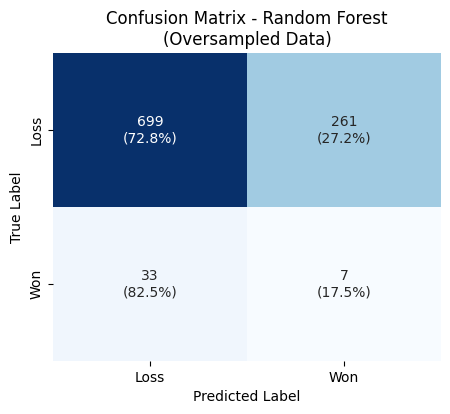

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Combine counts and percentages
cm_labels = np.array([f"{count}\n({perc:.1%})"
                      for count, perc in zip(cm.flatten(), cm_norm.flatten())]).reshape(cm.shape)

labels = ['Loss', 'Won']

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest\n(Oversampled Data)')
plt.show()

In [ ]:
X_test.shape

(1000, 55)

In [ ]:
X_train.shape

(4000, 55)

In [ ]:
y_train.shape

(4000,)

In [ ]:
y_test

,ConvertedToSale
0,0
1,1
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import f1_score

# Macro F1-score (average of F1 for each class)
f1_macro = f1_score(y_test, y_pred, average='macro')

# Weighted F1-score (weighted by class support)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("Macro F1-score:", f1_macro)
print("Weighted F1-score:", f1_weighted)

Macro F1-score: 0.43584784010315925
Weighted F1-score: 0.795009671179884


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.67      0.79       960
           1       0.03      0.25      0.05        40

    accuracy                           0.65      1000
   macro avg       0.49      0.46      0.42      1000
weighted avg       0.92      0.65      0.76      1000


Confusion Matrix:
 [[640 320]
 [ 30  10]]


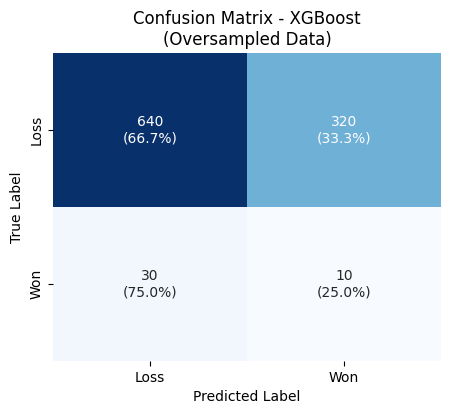

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Combine counts and percentages
cm_labels = np.array([f"{count}\n({perc:.1%})"
                      for count, perc in zip(cm.flatten(), cm_norm.flatten())]).reshape(cm.shape)

labels = ['Loss', 'Won']

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost\n(Oversampled Data)')
plt.show()

In [ ]:
# Get predicted values
y_pred_xgb2 = xgb_model.predict(X_test)

# True positives (predicted 1, actual 1)
won_rows = test_df[(y_test == 1) & (y_pred_xgb == 1)]

print(won_rows)
print("Number of true positive 'Won' rows:", len(won_rows))

     ProductPrice  QuoteAmount  ConvertedToSale  Discount  CustomerAge  \
1           89.00        75.65                1      0.15         49.0   
57          62.99        59.84                1      0.05         34.0   
86          87.45        78.71                1      0.10         27.0   
133         78.00        62.40                1      0.20         46.0   
328        210.00       178.50                1      0.15         40.0   
346         95.00        85.50                1      0.10         60.0   
408        197.00       177.30                1      0.10         48.0   
414        229.00       206.10                1      0.10         43.0   
928        210.00       178.50                1      0.15         40.0   
967        285.00       256.50                1      0.10         28.0   

     PreQuoteVisits  ProductCategory_Apparel  ProductCategory_Beauty  \
1               8.0                      0.0                     1.0   
57              2.0                      

In [ ]:
# List of correct row indexes
correct_idx = [57, 86, 133, 328, 346, 408, 928, 967]

# Get those rows from X_test
correct_rows = X_test_non_en.loc[correct_idx]

print(correct_rows)

    ProductCategory  ProductPrice  QuoteAmount  Discount   Channel  \
57          Apparel         62.99        59.84      0.05  Referral   
86          Outdoor         87.45        78.71      0.10    Social   
133     Electronics         78.00        62.40      0.20  Referral   
328     Electronics        210.00       178.50      0.15    Social   
346         Outdoor         95.00        85.50      0.10       App   
408     Electronics        197.00       177.30      0.10       App   
928     Electronics        210.00       178.50      0.15    Social   
967            Home        285.00       256.50      0.10  Referral   

     CustomerAge      Region  PreQuoteVisits  PaymentMethod        day  month  
57          34.0    Missouri             2.0  Bank Transfer  Wednesday    May  
86          27.0  California             4.0      Gift Card   Thursday    May  
133         46.0      Oregon             2.0      Gift Card  Wednesday    May  
328         40.0     Florida             3.0     